<a href="https://colab.research.google.com/github/sarthakkaushik/Cdiscount-Image-Classification/blob/main/Cdiscount_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code to mount google drive in case you are loading the data from your google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
data_path = '/gdrive/MyDrive/UOH Assignment Dataset/cdiscount'

In [5]:
import os 
data_path = '/gdrive/MyDrive/UOH Assignment Dataset/cdiscount'
os.chdir(data_path)
print(os.getcwd())

/gdrive/MyDrive/UOH Assignment Dataset/cdiscount


In [8]:
# !pip install Pillow
import numpy as np
import pandas as pd
import io
import bson
import matplotlib.pyplot as plt
from imageio import imread
from tqdm import tqdm_notebook

In [12]:
import os, sys, math, io
import numpy as np
import pandas as pd
import multiprocessing as mp
import bson
import struct

%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

from collections import defaultdict
from tqdm import *

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../cdiscount"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

categories.csv
category_names.csv
sample_submission.csv
test.bson
Test_Image_1.jpeg
train.bson
train_example.bson
train_images.csv
train_offsets.csv
val_images.csv



In [15]:
data_dir = "../cdiscount/"

train_bson_path = os.path.join(data_dir, "category_names.csv")

In [16]:
categories = pd.read_csv(train_bson_path, index_col='category_id')

In [33]:
categories.head()

,category_level1,category_level2,category_level3
category_id,,,
1000021794,ABONNEMENT / SERVICES,CARTE PREPAYEE,CARTE PREPAYEE MULTIMEDIA
1000012764,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI FUMEUR
1000012776,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI VELO - ABRI MOTO
1000012768,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,FONTAINE A EAU
1000012755,AMENAGEMENT URBAIN - VOIRIE,SIGNALETIQUE,PANNEAU D'INFORMATION EXTERIEUR


In [18]:
data_dir = "../cdiscount/"

train_bson_path = os.path.join(data_dir, "train.bson")

In [19]:
prod_id = []
prod_category = []
prod_num_imgs = []

num_dicts = 7069896 # according to data page

# This will take about 02m15s to complete
with open(train_bson_path, 'rb') as f, tqdm_notebook(total=num_dicts) as bar:
        
    data = bson.decode_file_iter(f)

    for c, d in enumerate(data):
        bar.update()
        prod_id.append(d['_id'])
        prod_category.append(d['category_id'])
        prod_num_imgs.append(len(d['imgs']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/7069896 [00:00<?, ?it/s]

In [20]:
#Create the dataframe
df_dict = {
    'category': prod_category,
    'num_imgs': prod_num_imgs
}
df = pd.DataFrame(df_dict, index=prod_id)
del df_dict # Free memory

In [24]:
df.head()

,category,num_imgs
0,1000010653,1
1,1000010653,1
2,1000004079,1
3,1000004141,1
4,1000015539,1


In [29]:
df.columns

Index(['category', 'num_imgs'], dtype='object')

1    4369441
2    1128588
4    1029075
3     542792
Name: num_imgs, dtype: int64

#Number of Image Per Category

In [31]:
df['num_imgs'].value_counts()

1    4369441
2    1128588
4    1029075
3     542792
Name: num_imgs, dtype: int64

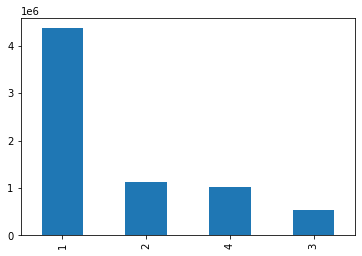

In [21]:
df.num_imgs.value_counts().plot(kind='bar');

# Let's see the top 10 most common category from the category table

In [37]:
df.category.value_counts().to_frame().head(10).join(categories)

,category,category_level1,category_level2,category_level3
1000018296,79640,MUSIQUE,CD,CD POP ROCK - CD ROCK INDE
1000011423,71116,INFORMATIQUE,IMPRESSION - SCANNER,TONER - RECUPERATEUR DE TONER
1000011427,69784,INFORMATIQUE,IMPRESSION - SCANNER,CARTOUCHE IMPRIMANTE
1000014202,65642,LIBRAIRIE,LITTERATURE,LITTERATURE FRANCAISE
1000015309,65435,LIBRAIRIE,AUTRES LIVRES,AUTRES LIVRES
1000004085,61942,INFORMATIQUE,CONNECTIQUE - ALIMENTATION,BATTERIE D'ALIMENTATION INFORMATIQUE
1000010653,61688,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE
1000018290,60332,MUSIQUE,CD,CD MUSIQUE CLASSIQUE
1000018294,57748,MUSIQUE,CD,CD MUSIQUE DU MONDE
1000008094,56192,INFORMATIQUE,COMPOSANT - PIECE DETACHEE,DALLE D'ECRAN


# Let's see the top 10 least common category from the category table

In [38]:
df.category.value_counts().to_frame().tail(10).join(categories)

,category,category_level1,category_level2,category_level3
1000000896,12,EPICERIE,CONSERVE DE LEGUME,POIVRON EN CONSERVE
1000015609,12,CHAUSSURES - ACCESSOIRES,ACCESSOIRES CHAUSSURES,ESSUIE-BOTTES - LAVE-BOTTES
1000019484,12,MEUBLE,ACCESSOIRE DE MEUBLE,COLONNE SUSPENDUE
1000019804,12,SPORT,BASEBALL,BLOUSON DE BASEBALL - VESTE DE BASEBALL
1000007168,12,SPORT,CYCLES,TRIPORTEUR
1000022325,12,TV - VIDEO - SON,LECTEUR MUSIQUE,LECTEUR MP4 RECONDITIONNE - LECTEUR NUMERIQUE ...
1000015046,12,MATERIEL DE BUREAU,MATERIEL PEDAGOGIQUE,REGISTRE D'APPEL - CAHIER DE CLASSE
1000011955,12,MATERIEL MEDICAL,SOIN,CATHETER - OBTURATEUR
1000007760,12,PUERICULTURE,TOILETTE BEBE,EXTENSION DE ROBINET
1000010893,12,PHOTO - OPTIQUE,VISIONNAGE PHOTO,SCANNER DE DIAPOSITIVE
